In [1]:
import math
import random
import numpy as np
from typing import List, ClassVar, Callable
import matplotlib.pyplot as plot


In [4]:
class Person:
    def __init__(self, traits: List[float], fitness_function: ClassVar):
        self.fitness: float or None = None
        self.traits = traits

        self.retrospective_coefficient = 0.2
        self.fitness_function: ClassVar = fitness_function

    def calculate_fitness(self):
        self.fitness = self.fitness_function.run(self.traits)

    def improve_traits_from(self, other_person: Person):
        new_traits = []
        for i in range(0, len(self.traits)):
            old_trait = self.traits[i]
            new_trait = self.retrospective_coefficient * old_trait + random.random() * (other_person.traits[i] - old_trait)
            new_traits.append(new_trait)

        new_fitness = self.fitness_function.run(new_traits)
        if self.fitness_function.new_fitness_better_than(old_fitness=self.fitness, new_fitness=new_fitness):
            self.traits = new_traits
            self.fitness = new_fitness

    def acquire_traits_from(self, other_person: Person, best_person: Person):
        new_traits = []
        for i in range(0, len(self.traits)):
            old_trait = self.traits[i]
            new_trait = old_trait + random.random() * (old_trait - other_person.traits[i]) + random.random() * (best_person.traits[i] - old_trait)
            new_traits.append(new_trait)

        new_fitness = self.fitness_function.run(new_traits)
        if self.fitness_function.new_fitness_better_than(old_fitness=self.fitness, new_fitness=new_fitness):
            self.traits = new_traits
            self.fitness = new_fitness

    def has_better_fitness_than(self, other_person: Person) -> bool:
        return self.fitness_function.person_has_better_fitness_than(other_person, self)


In [5]:
class schwefel2_21Function:
    @staticmethod
    def run(traits:List)->float:
        sum=0
        for i in traits:
            sum=max(sum,abs(i))
        return sum
    
    
    @staticmethod
    def new_fitness_better_than(old_fitness: float, new_fitness: float) -> bool:
        return new_fitness < old_fitness

    @staticmethod
    def person_has_better_fitness_than(other_person: Person,to_compare_person: Person) -> bool:
        return to_compare_person.fitness < other_person.fitness
    

In [6]:
class PersonMaker:
    def __init__(self, person_count: int, traits_count: int,traits_range_min: float, traits_range_max: float):
        self.person_count = person_count
        self.traits_count = traits_count
        self.traits_range_min = traits_range_min
        self.traits_range_max = traits_range_max
    def make_persons_with_traits_and_fitness_function(self,make_traits: Callable,fitness_function: ClassVar) -> List[Person]:
        persons = []
        for i in range(0, self.person_count):
            traits = make_traits()
            person = Person(traits, fitness_function)
            persons.append(person)
        return persons
    def make_traits(self) -> List[float]:
        traits = []
        for j in range(0, self.traits_count):
            value = random.uniform(self.traits_range_min, self.traits_range_max)
            traits.append(value)
        return traits
    def make_rounded_off_traits(self) -> List[float]:
        traits = []
        for j in range(0, self.traits_count):
            value = random.uniform(self.traits_range_min, self.traits_range_max)
            value = math.ceil(value) if math.ceil(value) <self.traits_range_max else math.floor(value)
            traits.append(value)
        return traits
    def select_elite(self, population: List[Person]) -> Person:
        best_person = min(population, key=lambda x: x.fitness)
        return best_person


In [7]:
class PopulationGroupE:
    def __init__(self, generations: int, person_maker: PersonMaker,fitness_function: ClassVar):
        self.generations = generations
        self.population: List[Person] = []
        self.person_maker = person_maker
        self.best_person: Person or None = None
        self.fitness_function = fitness_function
        self.best_fitness_history = []
    
    def populate(self):
        self.population =self.person_maker.make_persons_with_traits_and_fitness_function(make_traits=self.person_maker.make_rounded_off_traits,fitness_function=self.fitness_function)
        
    def calculate_population_fitness(self):
        for person in self.population:
            person.calculate_fitness()
    
    def find_best_person(self):
        self.best_person = min(self.population, key=lambda x: x.fitness)
        
    def improve_traits(self):
        for person in self.population:
            if person is not self.best_person:
                person.improve_traits_from(self.best_person)
    
    def acquire_traits(self):
        for idx in range(0, len(self.population)):
            person = self.population[idx]
            random_person = self.population[random.choice([i for i in range(0, len(self.population)) if i != idx])]
            if self.fitness_function.person_has_better_fitness_than(other_person=random_person,to_compare_person=person):
                random_person.acquire_traits_from(person, self.best_person)
            else:
                person.acquire_traits_from(random_person, self.best_person)
                
    def run_generations(self):
        self.calculate_population_fitness()
        elite_person=min(self.population, key=lambda x: x.fitness)
        for _ in range(0, self.generations):
            least_fit_index = max(range(len(self.population)), key=lambda i: self.population[i].fitness)
            least_fit_person = self.population[least_fit_index]
            self.population[least_fit_index] = elite_person
            self.find_best_person()
            self.best_fitness_history.append(self.best_person.fitness)
            self.improve_traits()
            self.find_best_person()
            self.acquire_traits()
            elite_person = self.person_maker.select_elite(self.population)

    

In [8]:
class PopulationGroup:
    def __init__(self, generations: int, person_maker: PersonMaker,fitness_function: ClassVar):
        self.generations = generations
        self.population: List[Person] = []
        self.person_maker = person_maker
        self.best_person: Person or None = None
        self.fitness_function = fitness_function
        self.best_fitness_history = []
    
    def populate(self):
        self.population =self.person_maker.make_persons_with_traits_and_fitness_function(make_traits=self.person_maker.make_rounded_off_traits,fitness_function=self.fitness_function)
        
    def calculate_population_fitness(self):
        for person in self.population:
            person.calculate_fitness()
    
    def find_best_person(self):
        self.best_person = min(self.population, key=lambda x: x.fitness)
        
    def improve_traits(self):
        for person in self.population:
            if person is not self.best_person:
                person.improve_traits_from(self.best_person)
    
    def acquire_traits(self):
        for idx in range(0, len(self.population)):
            person = self.population[idx]
            random_person = self.population[random.choice([i for i in range(0, len(self.population)) if i != idx])]
            if self.fitness_function.person_has_better_fitness_than(other_person=random_person,to_compare_person=person):
                random_person.acquire_traits_from(person, self.best_person)
            else:
                person.acquire_traits_from(random_person, self.best_person)
                
    def run_generations(self):
        self.calculate_population_fitness()
        for _ in range(0, self.generations):
            self.find_best_person()
            self.best_fitness_history.append(self.best_person.fitness)
            self.improve_traits()
            self.find_best_person()
            self.acquire_traits()

    

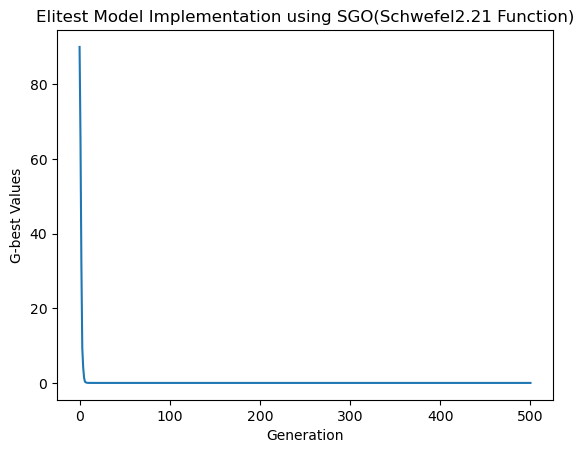

In [9]:
generation_value = 500
population = PopulationGroupE(generations=generation_value,person_maker=PersonMaker(10, 30, -100, 100),fitness_function=schwefel2_21Function)
population.populate()
population.run_generations()
population.find_best_person()
population.best_fitness_history.append(population.best_person.fitness)
x_axis = range(0, generation_value + 1)
y_axis = population.best_fitness_history.copy()
y1_axis=population.best_fitness_history.copy()
#print("gbest Values:")
#print(y_axis)
plot.title('Elitest Model Implementation using SGO(Schwefel2.21 Function)')
plot.xlabel('Generation')
plot.ylabel('G-best Values')
plot.plot(x_axis, y_axis)

plot.draw()
plot.show()

In [10]:
print("gbest Values:")
print(y_axis)

gbest Values:
[90, 65.79454822879009, 31.988119559126318, 9.345380720545778, 4.209831746250138, 1.389375979083281, 0.30231529081214964, 0.14833068558169596, 0.041297121326247105, 0.008243285626408739, 0.004341640853416249, 0.0014319202523346132, 0.0006633676497675504, 0.00020262846607935165, 4.011536340567446e-05, 7.82028430118561e-06, 2.3120921518278395e-06, 3.5311903160935683e-07, 6.421925378555614e-08, 1.1436061386648124e-08, 4.026726619416336e-09, 9.656758030962731e-10, 4.3994101775514755e-10, 1.4413719929036529e-10, 7.522935705676273e-11, 1.50295628589179e-11, 2.585467789698221e-12, 5.560013824161916e-13, 3.533801148173719e-13, 7.05587333461462e-14, 1.4130418741527826e-14, 3.677630405752616e-15, 7.620266596630104e-16, 1.5202194899629233e-16, 6.671651888681523e-17, 1.3334678667126222e-17, 1.3334678667126222e-17, 1.3334678667126222e-17, 1.3334678667126222e-17, 1.3334678667126222e-17, 1.3334678667126222e-17, 1.3334678667126222e-17, 1.3334678667126222e-17, 1.3334678667126222e-17, 1.33

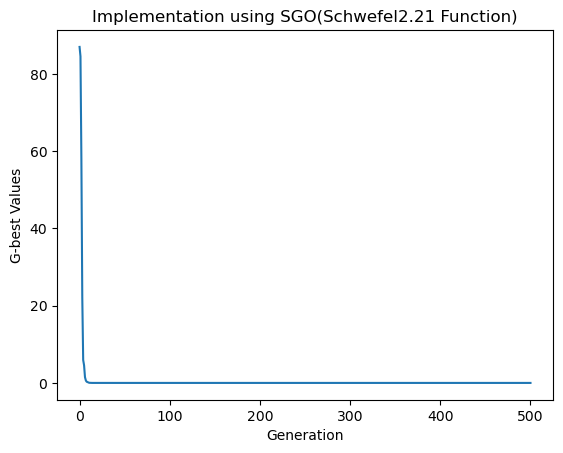

In [11]:
generation_value = 500
population = PopulationGroup(generations=generation_value,person_maker=PersonMaker(10, 30, -100, 100),fitness_function=schwefel2_21Function)
population.populate()
population.run_generations()
population.find_best_person()
population.best_fitness_history.append(population.best_person.fitness)
x_axis = range(0, generation_value + 1)
y_axis = population.best_fitness_history.copy()
#print("gbest Values:")
#print(y_axis)
plot.title('Implementation using SGO(Schwefel2.21 Function)')
plot.xlabel('Generation')
plot.ylabel('G-best Values')
plot.plot(x_axis, y_axis)

plot.draw()
plot.show()

In [12]:
print("gbest Values:")
print(y_axis)

gbest Values:
[87, 84.55081756236618, 58.218857242345734, 22.16902793470407, 5.937812895536707, 4.549053529938662, 1.4896750862005732, 0.6026562089128413, 0.2873666778787545, 0.20627427855376868, 0.08814590193712649, 0.030787738323186417, 0.013717863233035931, 0.005485965090590574, 0.002114838192258864, 0.0008055922321937013, 0.00037333195534901904, 0.00019941420639789427, 5.2649905798630814e-05, 3.6105079769708594e-05, 1.7591933426023627e-05, 7.345761016600307e-06, 3.4541970493185645e-06, 1.2100520943066767e-06, 4.54076029786576e-07, 2.999825247365187e-07, 1.0209065769070805e-07, 6.09174328752322e-08, 3.747442740668438e-08, 1.198563069748208e-08, 4.073911901397761e-09, 2.3013372855874236e-09, 6.6208482422029e-10, 3.097899183893898e-10, 7.512895338711092e-11, 3.041793938542505e-11, 2.9545689476024416e-11, 1.2218195609690757e-11, 5.439651922144366e-12, 1.9554782961674572e-12, 1.4357932954313892e-12, 3.0265996283923687e-13, 2.768050000429731e-13, 1.0335429472614435e-13, 4.445664326351126

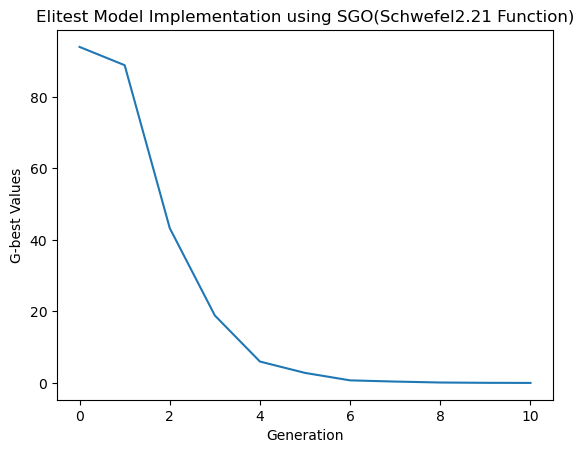

In [13]:
generation_value = 10
population = PopulationGroupE(generations=generation_value,person_maker=PersonMaker(10, 30, -100, 100),fitness_function=schwefel2_21Function)
population.populate()
population.run_generations()
population.find_best_person()
population.best_fitness_history.append(population.best_person.fitness)
x_axis = range(0, generation_value + 1)
y_axis = population.best_fitness_history.copy()
y1_axis=population.best_fitness_history.copy()
#print("gbest Values:")
#print(y_axis)
plot.title('Elitest Model Implementation using SGO(Schwefel2.21 Function)')
plot.xlabel('Generation')
plot.ylabel('G-best Values')
plot.plot(x_axis, y_axis)

plot.draw()
plot.show()

In [14]:
print("gbest Values:")
print(y_axis)

gbest Values:
[94, 88.88754668621826, 43.31267342929372, 18.877549941194403, 5.994422182590045, 2.8181815818742058, 0.7302178842221279, 0.3933444936439705, 0.12962409529262692, 0.04439500720722076, 0.014918151288732757]


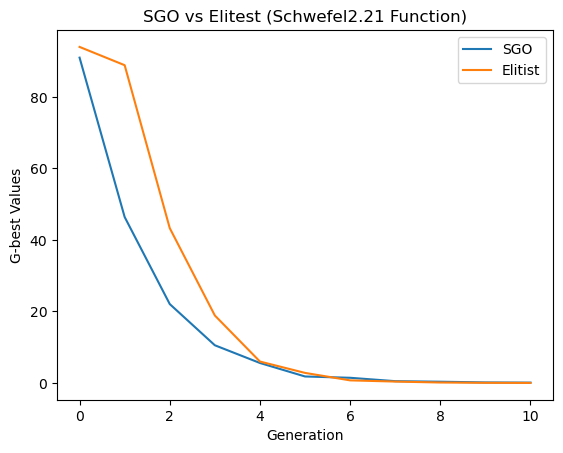

In [15]:
generation_value = 10
population = PopulationGroup(generations=generation_value,person_maker=PersonMaker(10, 30, -100, 100),fitness_function=schwefel2_21Function)
population.populate()
population.run_generations()
population.find_best_person()
population.best_fitness_history.append(population.best_person.fitness)
x_axis = range(0, generation_value + 1)
y_axis = population.best_fitness_history.copy()
#print("gbest Values:")
#print(y_axis)
plot.title('SGO vs Elitest (Schwefel2.21 Function)')
plot.xlabel('Generation')
plot.ylabel('G-best Values')
plot.plot(x_axis, y_axis, label='SGO')
plot.plot(x_axis, y1_axis, label='Elitist')
plot.legend()


plot.draw()
plot.show()

In [16]:
print("gbest Values:")
print(y_axis)

gbest Values:
[91, 46.41653631000277, 22.071477259385947, 10.545848240922371, 5.590646098411485, 1.8196614822334547, 1.4523549071020967, 0.5060882328066689, 0.3533267136249908, 0.15529223168878364, 0.09816530702066768]
